In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

Train/Split first data

In [23]:
df = pd.read_csv('Ex1-Class-train-1.csv')

In [24]:
df = df.dropna()

In [25]:
X = df.drop(['id','x3','x4','x5','y'],axis=1) 
Y = df.iloc[:,-1]   # df.y

In [26]:
#   Train/Split data
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=42)  # 42

In [ ]:
# Check if there's null value
print(df)
print(df.isnull().sum())

Find best K value (GridSearchCV)

In [27]:
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,40)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(x_train, y_train)
gs.best_params_

{'n_neighbors': 13}

In [28]:
knn_final = KNeighborsClassifier(n_neighbors = 13)
knn_final.fit(x_train, y_train)
knn_final.score(x_test,y_test)

0.6551724137931034

Find the best K value (Plot accuracy)

In [29]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i)
  knn_manual.fit(x_train, y_train)
  accuracy.append(knn_manual.score(x_test,y_test))
  count.append(i)

# print(accuracy)
# print(count)

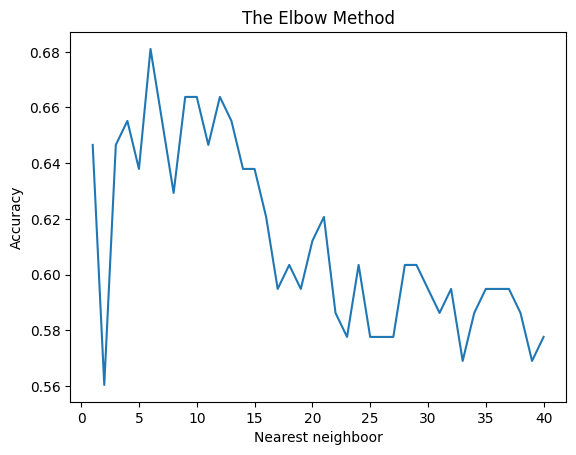

In [31]:
plt.title('The Elbow Method')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

Train/ split second data

In [32]:
df1 = pd.read_csv('Ex1-Class-unseen-1.csv')

In [33]:
df1 = df1.dropna()

In [34]:
X1 = df1.drop(['id','x3','x4','x5'],axis=1) 
Y1 = df1.iloc[:,-1]   # df.y

x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1, test_size=0.3,random_state=42) # 42

In [35]:
knn_new = KNeighborsClassifier(n_neighbors = 13)
knn_new.fit(x_train, y_train)
y_pred = knn_new.predict(X1)
# Print Accuracy
knn_new.score(x_train, y_train)

0.7111111111111111

IDFK

In [36]:
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(X)
  sse.append(km.inertia_)

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

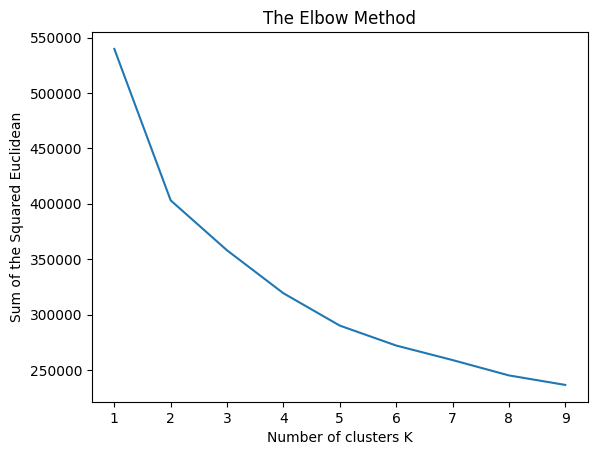

In [37]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [40]:
km1 = KMeans(n_clusters=3)
km1.fit(X)
y_cluster = km1.predict(X)
y_cluster

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0,
       2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2,

New data

In [41]:
pred = km1.predict(X1)
pred

array([2, 0, 2, 1, 2, 1, 1, 1, 0, 0])